In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import xgboost

### Combining numpy data into a dataframe

Note this assumes that when using the classifier, you labelled: 
* 0 for resting
* 1 for thumb curl
* 2 for index curl
* 3 for middle curl
* 4 for ring curl
* 5 for pinky curl
* 6 for closed fist  

If not please change `label_cols` and `data` to your mapping.

In [15]:
dataset_name = "400Each"
path = "../Neuro/Classifier/data/" + dataset_name + "/"

rest   = np.fromfile(path+"vals0.dat", dtype=np.uint16).reshape((-1, 8))
thumb  = np.fromfile(path+"vals1.dat", dtype=np.uint16).reshape((-1, 8))
index  = np.fromfile(path+"vals2.dat", dtype=np.uint16).reshape((-1, 8))
middle = np.fromfile(path+"vals3.dat", dtype=np.uint16).reshape((-1, 8))
ring   = np.fromfile(path+"vals4.dat", dtype=np.uint16).reshape((-1, 8))
pinky  = np.fromfile(path+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
fist   = np.fromfile(path+"vals6.dat", dtype=np.uint16).reshape((-1, 8))
data = [rest, thumb, index, middle, ring, pinky, fist]
label_cols = ['rest', 'thumb_in', 'index', 'middle', 'ring', 'pinky', 'fist']
df = pd.DataFrame(np.vstack(data))

In [16]:
# Seeing how many observations we got for each class
for i in range(len(data)):
    print(label_cols[i], data[i].shape[0])

rest 403
thumb_in 415
index 410
middle 412
ring 405
pinky 400
fist 409


In [17]:
# Adding a labels column
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df['Finger'] = df['Finger'].apply(lambda x: label_cols[x])

In [19]:
# Save the labelled CSV to file
df.to_csv(path+dataset_name+".csv", index=False)

Channel 4 (the bar with the LED) was placed in the middle of the proximal forearm during data collection as shown in this image:
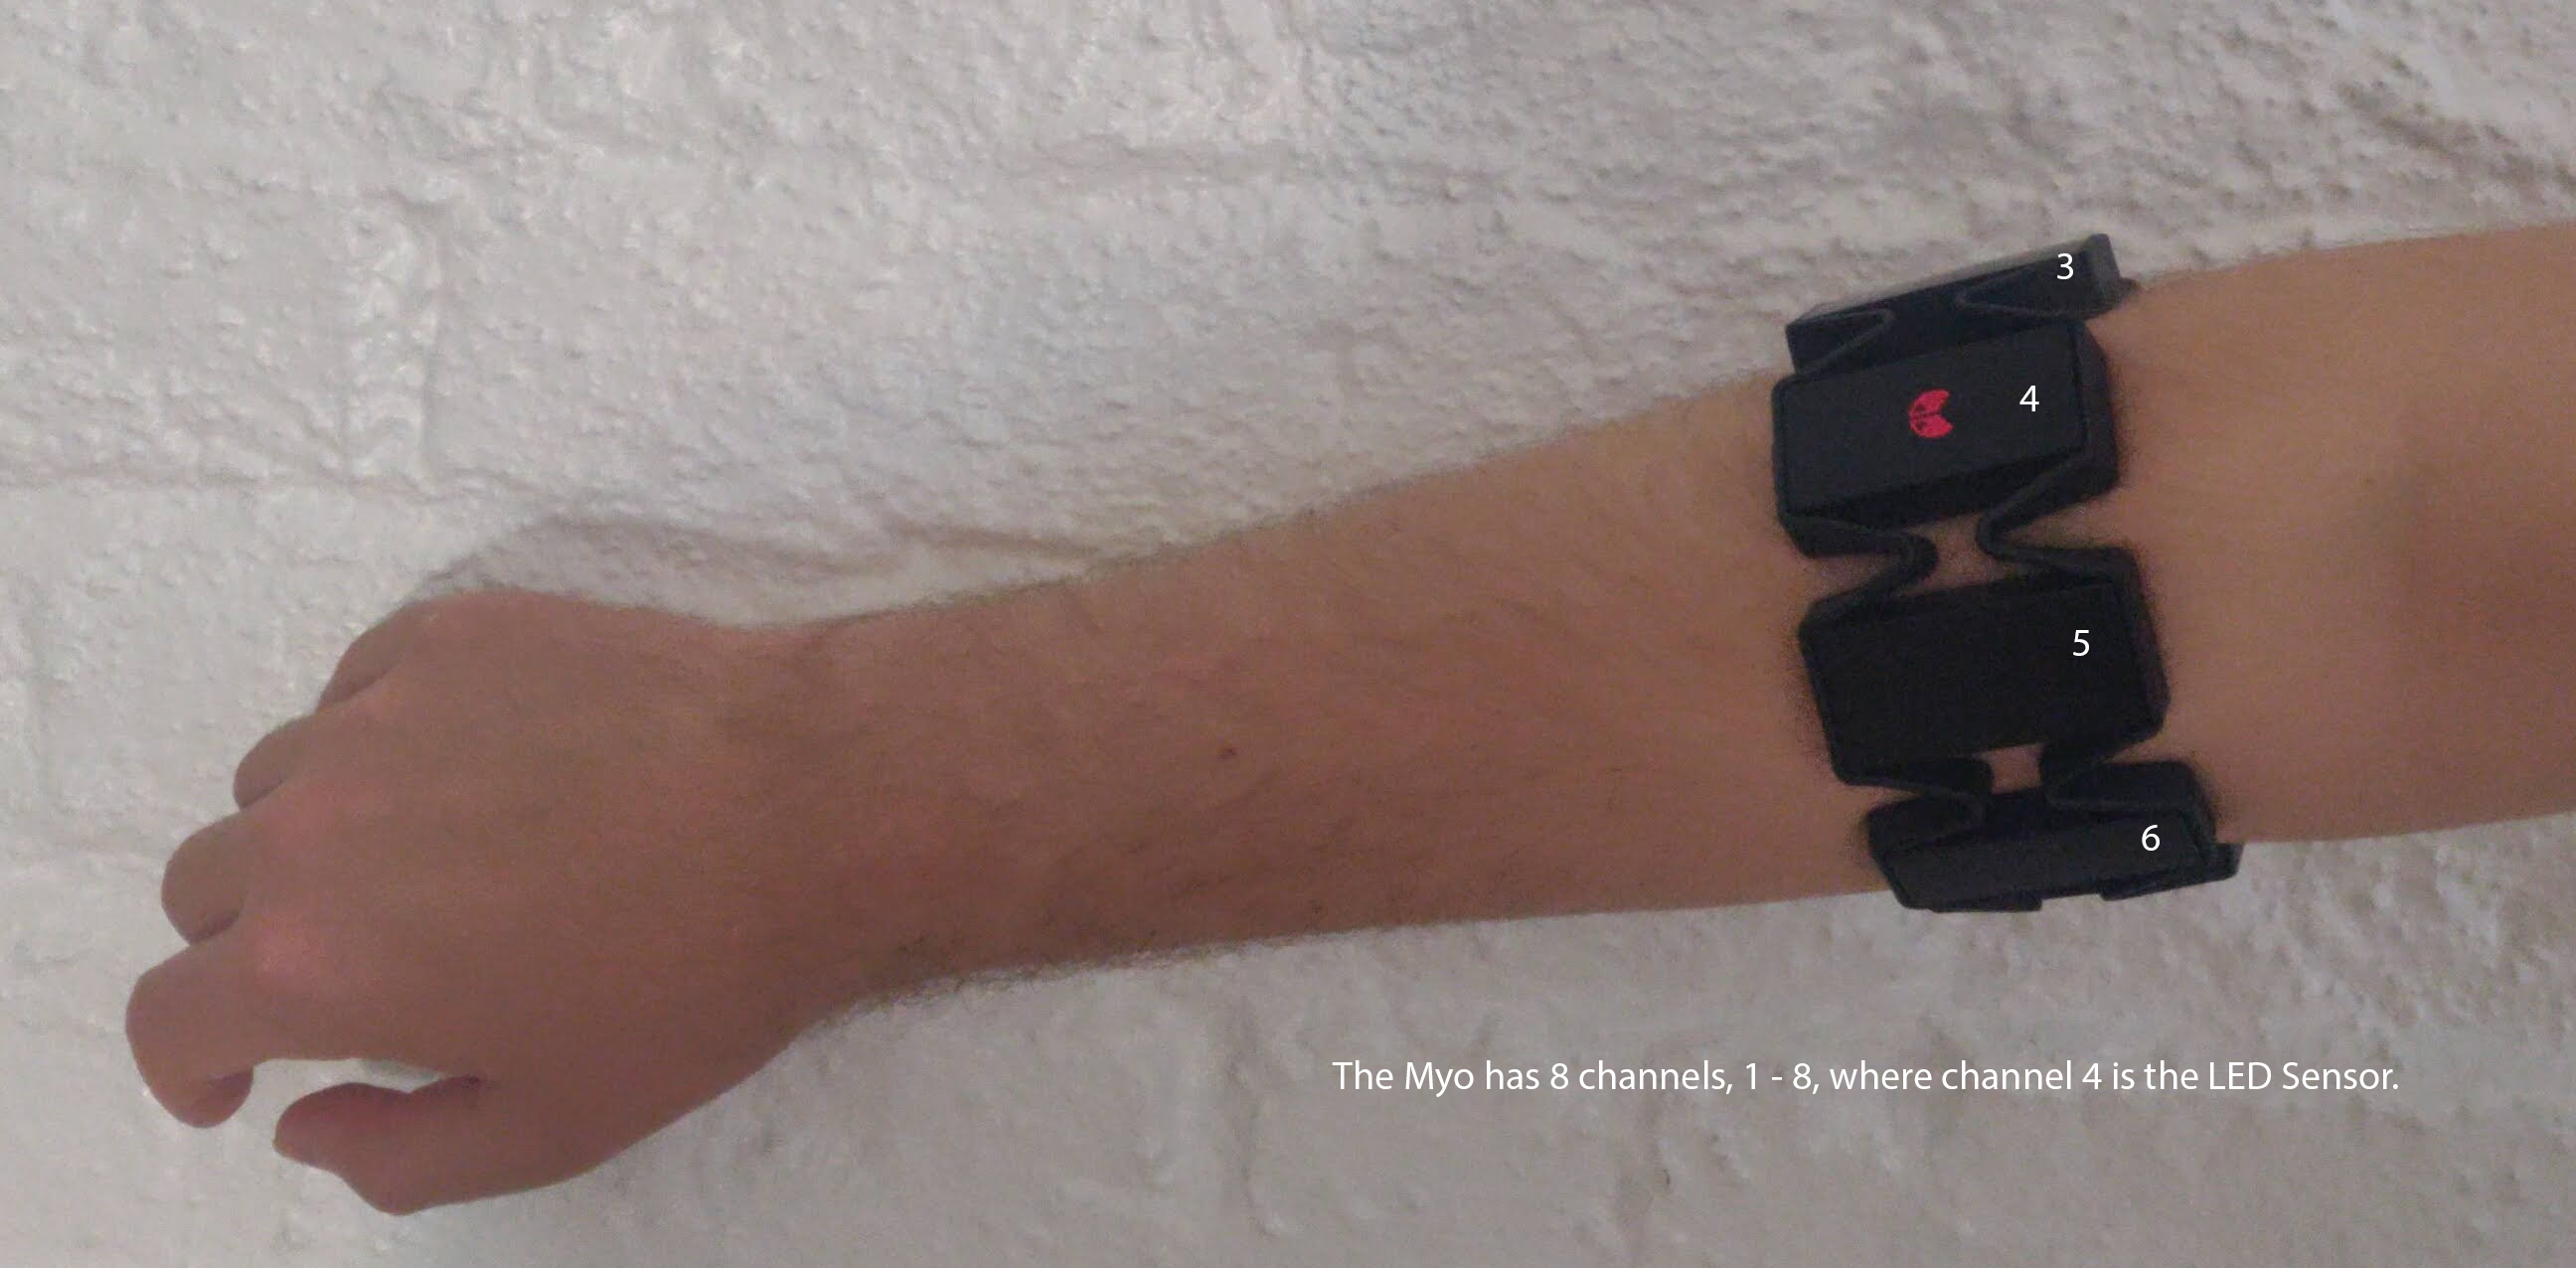

In [11]:
df.describe()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,152.964261,82.234057,130.099860,91.182901,44.419061,54.689559,83.756833,78.779608
std,216.818407,77.910595,94.963672,87.123862,16.569885,25.555003,82.148095,72.926537
min,16.000000,20.000000,21.000000,19.000000,22.000000,26.000000,22.000000,17.000000
25%,24.000000,33.000000,71.000000,39.000000,34.000000,40.000000,44.000000,29.000000
50%,33.000000,48.000000,102.500000,51.000000,39.000000,47.000000,58.500000,47.000000
75%,182.000000,109.000000,151.000000,97.000000,50.000000,57.000000,82.000000,112.000000
max,1137.000000,575.000000,666.000000,466.000000,147.000000,236.000000,551.000000,451.000000


In [20]:
df

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Finger
0,21,25,42,25,22,29,34,20,rest
1,22,27,41,26,23,29,35,21,rest
2,23,26,42,27,25,28,36,22,rest
3,23,26,48,25,24,29,38,23,rest
4,22,27,45,27,28,31,39,23,rest
...,...,...,...,...,...,...,...,...,...
2849,589,261,160,245,62,50,68,149,fist
2850,571,262,158,246,60,53,66,145,fist
2851,568,279,192,283,58,50,63,133,fist
2852,598,294,198,311,58,47,61,132,fist


In [ ]:
# Calculate